In [74]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import json

In [75]:
data_url = 'https://raw.githubusercontent.com/okolonasty-msu/soa-lectures/main/Data%20preparation%20and%20visualization%20in%20Python/imdb_movies_shows.csv'

In [76]:
# reading file from url
data = pd.read_csv(data_url)
data.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [77]:
data.shape

(5806, 11)

In [78]:
# работает только для численных переменных
data.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06


In [79]:
data.dtypes

title                    object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
dtype: object

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   release_year          5806 non-null   int64  
 3   age_certification     3196 non-null   object 
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   seasons               2047 non-null   float64
 8   imdb_id               5362 non-null   object 
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 499.1+ KB


In [81]:
data.head(3)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0


In [82]:
data.tail(3)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0
5805,Mighty Little Bheem: Kite Festival,SHOW,2021,NaN,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0


## Работа со столбцами 

In [83]:
data['title']

0       Five Came Back: The Reference Films
1                               Taxi Driver
2           Monty Python and the Holy Grail
3                             Life of Brian
4                              The Exorcist
                       ...                 
5801                              Fine Wine
5802                         Edis Starlight
5803                                  Clash
5804                         Shadow Parties
5805     Mighty Little Bheem: Kite Festival
Name: title, Length: 5806, dtype: object

In [84]:
data.title

0       Five Came Back: The Reference Films
1                               Taxi Driver
2           Monty Python and the Holy Grail
3                             Life of Brian
4                              The Exorcist
                       ...                 
5801                              Fine Wine
5802                         Edis Starlight
5803                                  Clash
5804                         Shadow Parties
5805     Mighty Little Bheem: Kite Festival
Name: title, Length: 5806, dtype: object

In [85]:
data['release_year'].describe()

count    5806.000000
mean     2016.013434
std         7.324883
min      1945.000000
25%      2015.000000
50%      2018.000000
75%      2020.000000
max      2022.000000
Name: release_year, dtype: float64

In [86]:
type(data['release_year'])

pandas.core.series.Series

Обращение к нескольким столбцам

In [87]:
data.index

RangeIndex(start=0, stop=5806, step=1)

In [88]:
data.columns

Index(['title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes'],
      dtype='object')

In [89]:
data.columns.values

array(['title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_id',
       'imdb_score', 'imdb_votes'], dtype=object)

In [90]:
data[['runtime', 'title', 'type', 'release_year', 'age_certification']]

,runtime,title,type,release_year,age_certification
0,48,Five Came Back: The Reference Films,SHOW,1945,TV-MA
1,113,Taxi Driver,MOVIE,1976,R
2,91,Monty Python and the Holy Grail,MOVIE,1975,PG
3,94,Life of Brian,MOVIE,1979,R
4,133,The Exorcist,MOVIE,1973,R
...,...,...,...,...,...
5801,100,Fine Wine,MOVIE,2021,NaN
5802,74,Edis Starlight,MOVIE,2021,NaN
5803,88,Clash,MOVIE,2021,NaN
5804,116,Shadow Parties,MOVIE,2021,NaN


In [91]:
data.iloc[0]

title                   Five Came Back: The Reference Films
type                                                   SHOW
release_year                                           1945
age_certification                                     TV-MA
runtime                                                  48
genres                                    ['documentation']
production_countries                                 ['US']
seasons                                                 1.0
imdb_id                                                 NaN
imdb_score                                              NaN
imdb_votes                                              NaN
Name: 0, dtype: object

In [92]:
data.iloc[[1]]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0


In [101]:
data.iloc[-3:-1]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,genres_list,production_countries_list
5803,Clash,MOVIE,2021,NaN,88,"[""family"", ""drama""]","[""NG"", ""CA""]",NaN,tt14620732,6.5,32.0,"[family, drama]","[NG, CA]"
5804,Shadow Parties,MOVIE,2021,NaN,116,"[""action"", ""thriller""]",[],NaN,tt10168094,6.2,9.0,"[action, thriller]",[]


In [102]:
data.iloc[0:3]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,genres_list,production_countries_list
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,"[""documentation""]","[""US""]",1.0,NaN,NaN,NaN,[documentation],[US]
1,Taxi Driver,MOVIE,1976,R,113,"[""crime"", ""drama""]","[""US""]",NaN,tt0075314,8.3,795222.0,"[crime, drama]",[US]
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"[""comedy"", ""fantasy""]","[""GB""]",NaN,tt0071853,8.2,530877.0,"[comedy, fantasy]",[GB]


# Превращаю строки в объекты питона c помощью apply

In [103]:
data['genres'] = data['genres'].apply(lambda x: x.replace("'", "\""))
data['genres_list'] = data['genres'].apply(json.loads)
type(data['genres'][0])

str

In [104]:
data['production_countries'] = data['production_countries'].str.replace("'", "\"")
data['production_countries_list'] = data['production_countries'].apply(json.loads)
type(data['production_countries_list'][0])

list

# Вытаскивание данных по условиям

data [условие] 

In [105]:
data['release_year'] == 2022

0       False
1       False
2       False
3       False
4       False
        ...  
5801    False
5802    False
5803    False
5804    False
5805    False
Name: release_year, Length: 5806, dtype: bool

In [106]:
data[(data['release_year'] == 2022) & (data['genres'].str.contains('documentation'))]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,genres_list,production_countries_list
4834,Our Great National Parks,SHOW,2022,NaN,52,"[""documentation""]","[""US""]",1.0,tt18750552,NaN,NaN,[documentation],[US]
4842,Conversations with a Killer: The John Wayne Ga...,SHOW,2022,TV-MA,61,"[""crime"", ""documentation""]","[""US""]",1.0,tt18970124,7.2,3984.0,"[crime, documentation]",[US]
4844,White Hot: The Rise & Fall of Abercrombie & Fitch,MOVIE,2022,R,88,"[""documentation""]","[""US""]",NaN,tt19034522,5.6,1184.0,[documentation],[US]
4851,Bad Vegan: Fame. Fraud. Fugitives.,SHOW,2022,TV-MA,52,"[""crime"", ""documentation""]","[""US""]",1.0,tt18260538,5.8,2062.0,"[crime, documentation]",[US]
4858,Hard Cell,SHOW,2022,TV-MA,26,"[""comedy"", ""documentation"", ""sport""]","[""US"", ""GB""]",1.0,tt14959710,6.1,618.0,"[comedy, documentation, sport]","[US, GB]"
4862,Jimmy Savile: A British Horror Story,SHOW,2022,TV-MA,85,"[""crime"", ""documentation""]","[""GB""]",1.0,tt18970454,6.7,4711.0,"[crime, documentation]",[GB]
4864,The Mystery of Marilyn Monroe: The Unheard Tapes,MOVIE,2022,R,101,"[""documentation""]","[""US""]",NaN,tt19034332,6.2,2233.0,[documentation],[US]
4876,Meltdown: Three Mile Island,SHOW,2022,TV-14,44,"[""documentation"", ""history""]","[""US""]",1.0,tt19757508,7.0,958.0,"[documentation, history]",[US]
4890,Return to Space,MOVIE,2022,NaN,128,"[""documentation""]","[""US""]",NaN,tt18555320,7.3,3270.0,[documentation],[US]
4896,The Andy Warhol Diaries,SHOW,2022,TV-MA,66,"[""documentation""]","[""US""]",1.0,tt18082212,7.7,1496.0,[documentation],[US]


data [условие] [столбцы]

In [107]:
data[(data['release_year'] == 2022) & (data['genres'].str.contains('documentation'))][['runtime', 'imdb_score']].head()

,runtime,imdb_score
4834,52,NaN
4842,61,7.2
4844,88,5.6
4851,52,5.8
4858,26,6.1


In [111]:
data[data['release_year'].isin([2000,2023])].head(2)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,genres_list,production_countries_list
105,Survivor,SHOW,2000,TV-PG,48,"[""reality""]","[""US""]",42.0,tt0239195,7.4,24368.0,[reality],[US]
116,Gilmore Girls,SHOW,2000,TV-14,46,"[""comedy"", ""drama""]","[""US""]",8.0,tt0238784,8.2,119054.0,"[comedy, drama]",[US]


In [112]:
data[ data['release_year'].isin(range(2000,2023))].head(2)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,genres_list,production_countries_list
105,Survivor,SHOW,2000,TV-PG,48,"[""reality""]","[""US""]",42.0,tt0239195,7.4,24368.0,[reality],[US]
116,Gilmore Girls,SHOW,2000,TV-14,46,"[""comedy"", ""drama""]","[""US""]",8.0,tt0238784,8.2,119054.0,"[comedy, drama]",[US]


In [113]:
data[ data['release_year'].isin(range(2000,2024))].head(2)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,genres_list,production_countries_list
105,Survivor,SHOW,2000,TV-PG,48,"[""reality""]","[""US""]",42.0,tt0239195,7.4,24368.0,[reality],[US]
116,Gilmore Girls,SHOW,2000,TV-14,46,"[""comedy"", ""drama""]","[""US""]",8.0,tt0238784,8.2,119054.0,"[comedy, drama]",[US]


In [114]:
data[ ~data['release_year'].isin(range(2000,2024))].head(2)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,genres_list,production_countries_list
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,"[""documentation""]","[""US""]",1.0,NaN,NaN,NaN,[documentation],[US]
1,Taxi Driver,MOVIE,1976,R,113,"[""crime"", ""drama""]","[""US""]",NaN,tt0075314,8.3,795222.0,"[crime, drama]",[US]


## Агрегирование 

Метод groub_by() позволяет группировать данные по каким-либо признакам и вычислять агрегированные значения

Например, средние, суммы, минимумы, максимумы и количество/ункальное количество 

Еще раз взглянем на датасет 

In [115]:
data.head(2)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,genres_list,production_countries_list
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,"[""documentation""]","[""US""]",1.0,NaN,NaN,NaN,[documentation],[US]
1,Taxi Driver,MOVIE,1976,R,113,"[""crime"", ""drama""]","[""US""]",NaN,tt0075314,8.3,795222.0,"[crime, drama]",[US]


In [116]:
data.index.name = "id"
data.reset_index(inplace = True)
data.head(1)

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,genres_list,production_countries_list
0,0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,"[""documentation""]","[""US""]",1.0,NaN,NaN,NaN,[documentation],[US]


In [117]:
gdf = pd.DataFrame(data.groupby(by = "release_year")["id"].count()).reset_index()

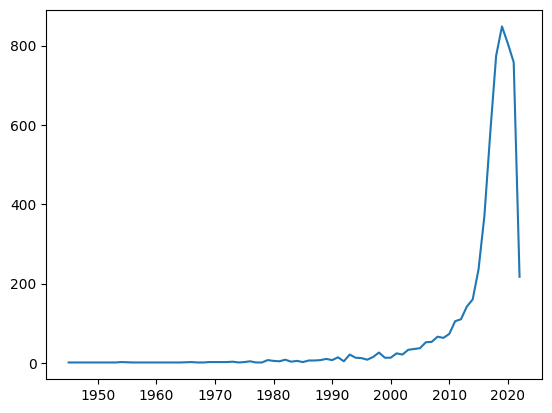

In [118]:
plt.plot(gdf["release_year"], gdf["id"])
plt.show()

In [119]:
ddf = data[data["genres"].str.contains("drama")].groupby(by = "release_year")["imdb_score"].mean()
ddf = pd.DataFrame(ddf).reset_index()

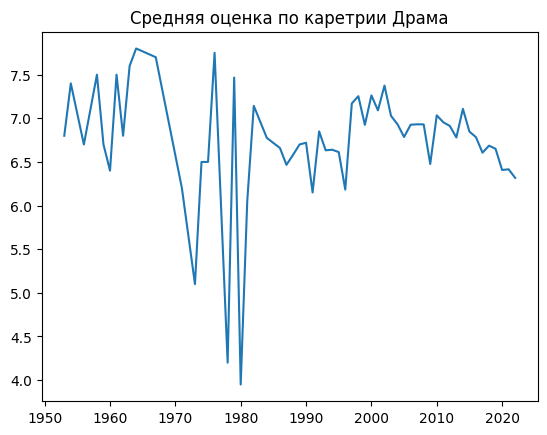

In [120]:
plt.figure
plt.plot(ddf["release_year"], ddf["imdb_score"])
plt.title("Средняя оценка по каретрии Драма")
plt.show()

In [142]:
data["is_drama"] = data["genres"].str.contains("drama")
data["is_comedy"] = data["genres"].str.contains("comedy")
data["drama_and_comedy"] = data["is_drama"] & data["is_comedy"]

In [143]:
ddf = data[ data["is_drama"] | data["is_comedy"] ].groupby(by = ["release_year", "is_drama", "drama_and_comedy"])["imdb_score"].mean()
ddf = pd.DataFrame(ddf).reset_index()

In [144]:
ddf

,release_year,is_drama,drama_and_comedy,imdb_score
0,1953,True,False,6.800000
1,1954,False,False,7.500000
2,1954,True,False,7.400000
3,1956,True,False,6.700000
4,1958,True,True,7.500000
...,...,...,...,...
141,2021,True,False,6.415353
142,2021,True,True,6.416190
143,2022,False,False,6.160976
144,2022,True,False,6.379412


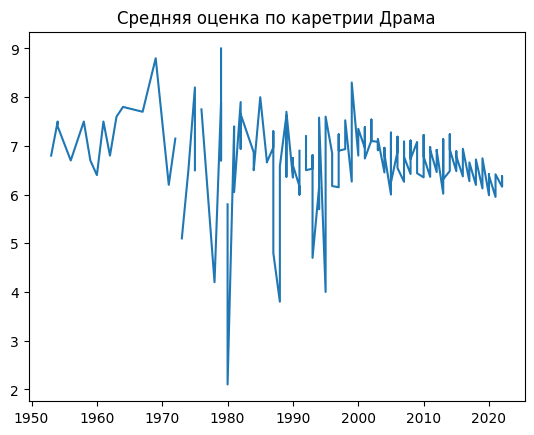

In [145]:
plt.figure
plt.plot(ddf["release_year"], ddf["imdb_score"])
plt.title("Средняя оценка по каретрии Драма")
plt.show()

In [146]:
import seaborn as sns

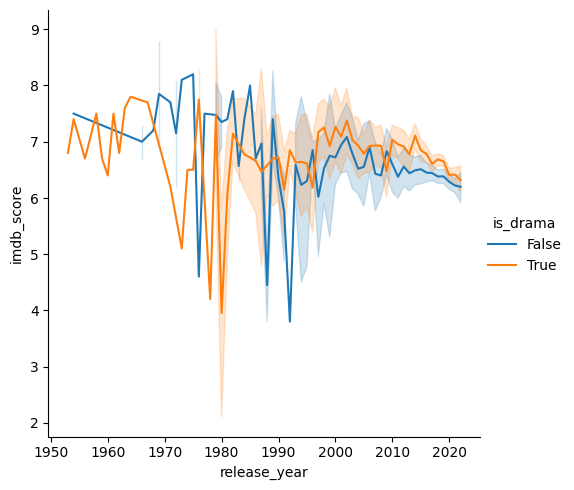

In [147]:
sns.relplot(data=data, x="release_year", y="imdb_score", hue="is_drama", kind="line")
plt.show()

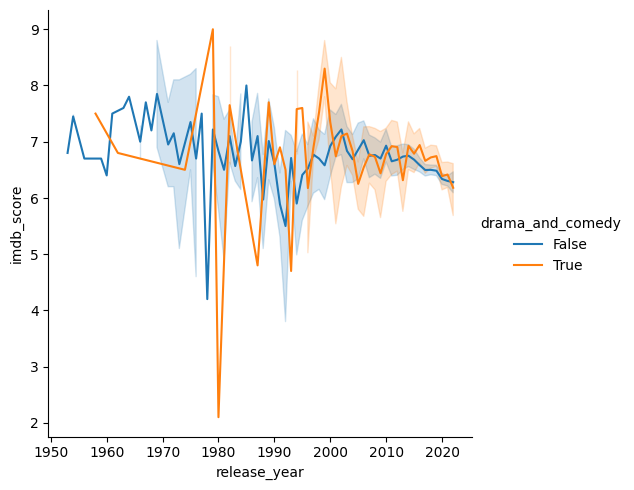

In [149]:
sns.relplot(data=data, x="release_year", y="imdb_score", hue="drama_and_comedy", kind="line")
plt.show()

## Pivot Table and Melt

In [154]:
data.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,genres_list,production_countries_list,is_drama,is_comedy,drama_and_comedy
0,0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,"[""documentation""]","[""US""]",1.0,NaN,NaN,NaN,[documentation],[US],False,False,False
1,1,Taxi Driver,MOVIE,1976,R,113,"[""crime"", ""drama""]","[""US""]",NaN,tt0075314,8.3,795222.0,"[crime, drama]",[US],True,False,False
2,2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"[""comedy"", ""fantasy""]","[""GB""]",NaN,tt0071853,8.2,530877.0,"[comedy, fantasy]",[GB],False,True,False
3,3,Life of Brian,MOVIE,1979,R,94,"[""comedy""]","[""GB""]",NaN,tt0079470,8.0,392419.0,[comedy],[GB],False,True,False
4,4,The Exorcist,MOVIE,1973,R,133,"[""horror""]","[""US""]",NaN,tt0070047,8.1,391942.0,[horror],[US],False,False,False


In [152]:
pd.pivot_table(data, values = "runtime", columns = "type", index = "release_year", aggfunc= "mean")

type,MOVIE,SHOW
release_year,,
1945,NaN,48.000000
1953,105.000000,NaN
1954,107.500000,NaN
1956,120.000000,NaN
1958,77.000000,NaN
...,...,...
2018,95.862579,39.435216
2019,94.255556,40.516234
2020,91.767535,39.542484


In [160]:
pd.melt(data, id_vars="title", value_vars = ["is_comedy", "is_drama"])

,title,variable,value
0,Five Came Back: The Reference Films,is_comedy,False
1,Taxi Driver,is_comedy,False
2,Monty Python and the Holy Grail,is_comedy,True
3,Life of Brian,is_comedy,True
4,The Exorcist,is_comedy,False
...,...,...,...
11607,Fine Wine,is_drama,True
11608,Edis Starlight,is_drama,False
11609,Clash,is_drama,True
11610,Shadow Parties,is_drama,False


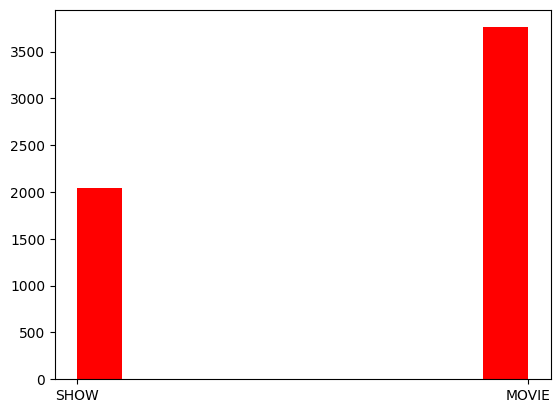

In [228]:
plt.hist(data['type'], color = 'red', label = 'type')
plt.show()

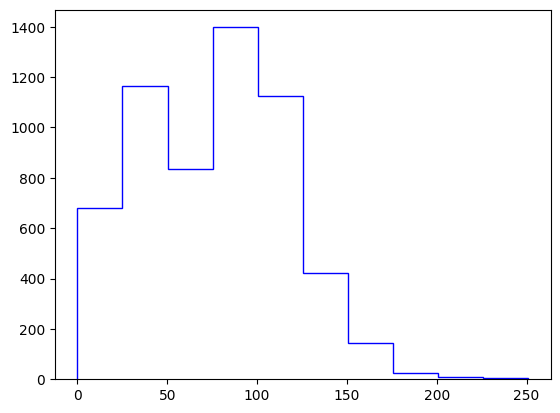

In [229]:
plt.hist(data['runtime'], color = 'blue', histtype = 'step')
plt.show()

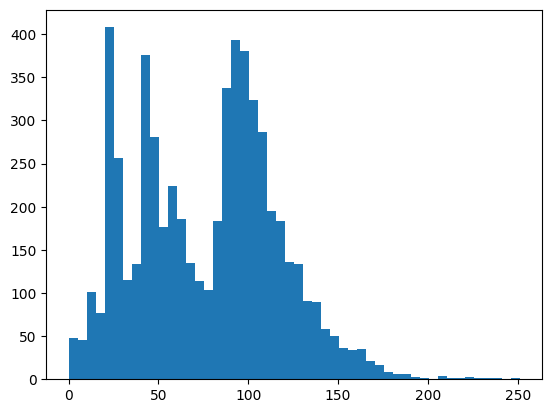

In [230]:
plt.hist(data['runtime'], bins = 50)
plt.show()

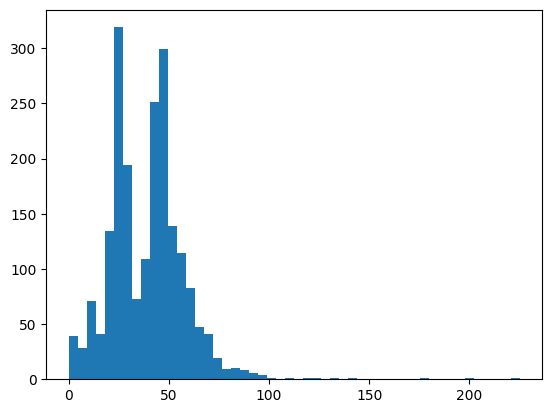

In [233]:
plt.hist(data[data['type'] == 'SHOW']['runtime'], bins = 50)
plt.show()

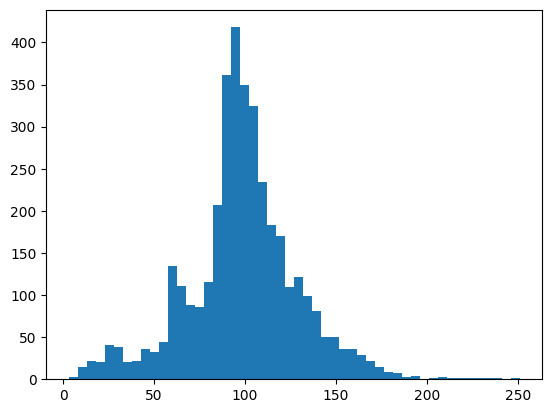

In [234]:
plt.hist(data[data['type'] == 'MOVIE']['runtime'], bins = 50)
plt.show()

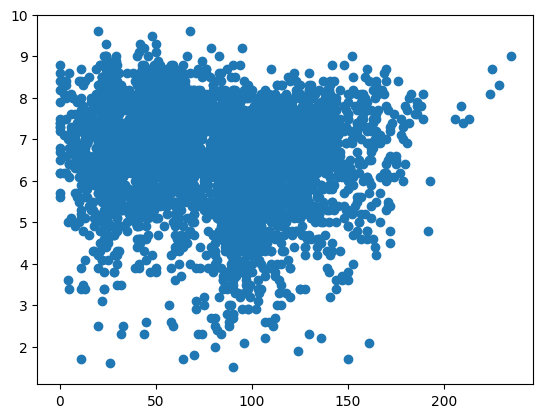

In [232]:
plt.scatter(data['runtime'], data['imdb_score'])
plt.show()